In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

%matplotlib inline


amsterdam = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/amsterdam_listings.csv',
                        encoding='ISO-8859-1')
barcelona = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/barcelona_listings.csv',
                        encoding='ISO-8859-1')
berlin = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/berlin_listings.csv', encoding='ISO-8859-1')
dublin = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/dublin_listings.csv', encoding='ISO-8859-1')
london = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/london_listings.csv', encoding='ISO-8859-1')
paris = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/paris_listings.csv', encoding='ISO-8859-1')
rome = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/rome_listings.csv', encoding='ISO-8859-1')
venice = pd.read_csv('/Users/jordanmazza/Desktop/Udacity/GitHub/airbnb/venice_listings.csv', encoding='ISO-8859-1')

amsterdam.head()

,NAME,GEO_ID,COUNTRY,LATITUDE,LONGITUDE,TYPE,ACCOM,BATH,ROOMS,BEDS,PRICE
0,Luxurious & spacecious apartm. with garden 6sleep,NL,Netherlands,52.361173,4.866755,Entire home/apt,6,1.0,2.0,6.0,$145.00
1,Great app near Jordaan +2 bikes,NL,Netherlands,52.370237,4.859507,Entire home/apt,2,1.0,1.0,1.0,$88.00
2,"Trendy apartment, near Vondelpark",NL,Netherlands,52.362016,4.866872,Entire home/apt,2,1.0,1.0,1.0,$130.00
3,Modern apartment in Amsterdam West,NL,Netherlands,52.365826,4.858178,Entire home/apt,4,1.0,2.0,3.0,$110.00
4,(Balcony with) canal view Oud-West,NL,Netherlands,52.364179,4.864885,Entire home/apt,2,1.0,1.0,1.0,$115.00


In [2]:
list = [amsterdam, barcelona, berlin, dublin, london, paris, rome, venice]
for data in list:
    data.columns = map(str.lower, data.columns)
    

In [3]:
new = pd.concat(list)
df = new.drop(columns = 'name')
df.isnull().any()

geo_id       False
country      False
latitude     False
longitude    False
type         False
accom        False
bath          True
rooms         True
beds          True
price        False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201880 entries, 0 to 6026
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   geo_id     201880 non-null  object 
 1   country    201880 non-null  object 
 2   latitude   201880 non-null  float64
 3   longitude  201880 non-null  float64
 4   type       201880 non-null  object 
 5   accom      201880 non-null  int64  
 6   bath       201218 non-null  float64
 7   rooms      201580 non-null  float64
 8   beds       201489 non-null  float64
 9   price      201880 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 16.9+ MB


In [9]:
df.price = df.price.replace('[\$,]','',regex=True).astype(float)

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.beds.isnull().sum()

0

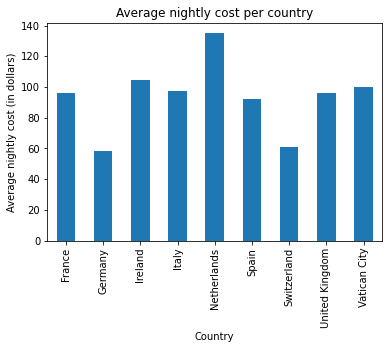

In [16]:
price = df.groupby('country', as_index=False)['price'].mean()

price.plot(kind='bar', x='country', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average nightly cost (in dollars)')
plt.title('Average nightly cost per country');

In [28]:
size = df.groupby('country', as_index=False)[['beds', 'bath', 'rooms']].mean()
size

,country,beds,bath,rooms
0,France,1.680200,1.093289,1.052413
1,Germany,1.609782,1.089769,1.169677
2,Ireland,1.827509,1.282855,1.412037
3,Italy,2.431860,1.269435,1.427372
4,Netherlands,1.875198,1.122986,1.412837
5,Spain,2.233825,1.288994,1.529790
6,Switzerland,1.000000,1.000000,0.000000
7,United Kingdom,1.709264,1.263180,1.355436
8,Vatican City,5.000000,1.500000,1.500000


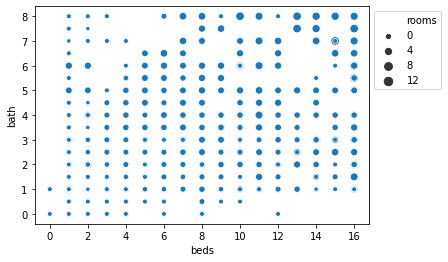

In [41]:
plt.figure(figsize=)
sns.scatterplot(data=df, x='beds', y='bath', size='rooms')
plt.legend(loc='upper left', bbox_to_anchor=[1,1]);

In [62]:
#Set up for Following Waffle Plot
total = df.shape[0]

netherlands = df.query('country == "Netherlands"').shape[0]
spain = df.query('country == "Spain"').shape[0]
germany = df.query('country == "Germany"').shape[0]
ireland = df.query('country == "Ireland"').shape[0]
uk = df.query('country == "United Kingdom"').shape[0]
france = df.query('country == "France"').shape[0]
switzerland = df.query('country == "Switzerland"').shape[0]
italy = df.query('country == "Italy"').shape[0]
vatican = df.query('country == "Vatican City"').shape[0]

netherlands_prop = round(100 * netherlands / total)
spain_prop = round(100 * spain / total)
germany_prop = round(100 * germany / total)
ireland_prop = round(100 * ireland / total)
uk_prop = round(100 * uk / total)
france_prop = round(100 * france / total)
switzerland_prop = round(100 * switzerland / total)
italy_prop = round(100 * italy / total)
vatican_prop = round(100 * vatican / total)

print(netherlands_prop, spain_prop, germany_prop, ireland_prop,
      uk_prop, france_prop, switzerland_prop, italy_prop, vatican_prop)

8 9 10 3 27 28 0 16 0


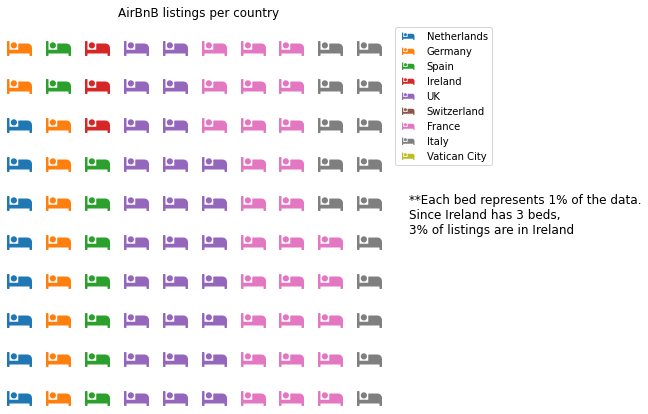

In [111]:
#proportion of airbnbs per country in the dataset 
colors = sns.color_palette('tab10')[0:9]
data = {'Netherlands': 8, 'Germany':10, 'Spain': 9, 'Ireland': 3,
        'UK': 27, 'Switzerland': 0, 'France': 28, 'Italy': 15, 'Vatican City': 0}
fig = plt.figure(FigureClass=Waffle,rows=10, values=data, figsize=[9,9],
                 colors = colors,
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
                 icons = 'bed', icon_size=20, icon_legend=True)
plt.title('AirBnB listings per country') 
plt.text(1.05,0.45,'**Each bed represents 1% of the data.\nSince Ireland has 3 beds,\n3% of listings are in Ireland',
        fontsize=12);
